# Task1 数据读取与数据分析

## 1.学习目标

In [ ]:
（1）使用Pandas读取赛题数据
（2）分析赛题数据的分布规律

## 2.数据读取

In [1]:
import pandas as pd
#每列数据之间的分隔符号设置为'\t', 因数据量较大，只读取前100行
train_df = pd.read_csv('../train_set.csv', sep='\t', nrows=100)
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


## 数据分析

我们主要关心以下三个问题：

（1）新闻文本的长度是多少

（2）新闻类别的分布是什么样

（3）每条新闻文本中字符分布是怎么样

In [2]:
#句子长度分析
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

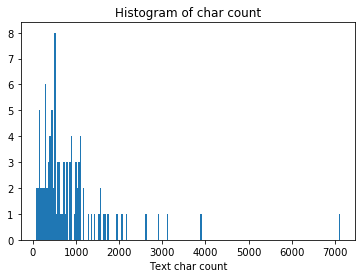

In [3]:
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

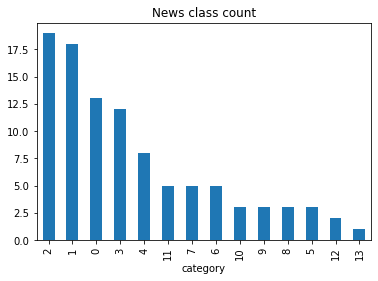

In [4]:
#新闻类别分析
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

In [5]:
#字符分布统计
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[-1])

2405
('3750', 3702)
('5034', 1)


In [6]:
#下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号

train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
# ('3750', 197997)

print(word_count[1])
# ('900', 197653)

print(word_count[2])

('900', 99)
('3750', 99)
('648', 96)


## 数据分析结论

（1）每个新闻平均字符个数较多，可能需要截断（其中标点符号需要剔除）

（2）由于类别不均衡，会严重影响模型的精度